<p style = "font-size : 30px; color : blue ; font-family : 'Optima'; text-align : center; border-radius: 5px 5px;"><strong>UEFA Champions League Statistics(1993-2020) Analysis </strong></p>

In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading out data
df = pd.read_csv('../input/ucl-statistics/ucl_stats.csv')

In [3]:
df.head(5)

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
0,1993,Marseille,6,3,3,0,14,4,10,9,1
1,1993,Milan,7,6,0,1,11,2,9,12,0
2,1993,Rangers,6,2,4,0,7,5,2,8,0
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0


In [4]:
df.shape

(720, 11)

In [5]:
print(df.columns.values)

['year' 'team' 'match_played' 'wins' 'draws' 'losts' 'goals_scored'
 'goals_conceded' 'gd' 'group_point' 'champions']


In [6]:
#let's see the concise summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            720 non-null    int64 
 1   team            720 non-null    object
 2   match_played    720 non-null    int64 
 3   wins            720 non-null    int64 
 4   draws           720 non-null    int64 
 5   losts           720 non-null    int64 
 6   goals_scored    720 non-null    int64 
 7   goals_conceded  720 non-null    int64 
 8   gd              720 non-null    int64 
 9   group_point     720 non-null    int64 
 10  champions       720 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 62.0+ KB


In [7]:
#check for null values
df.isna().sum()

year              0
team              0
match_played      0
wins              0
draws             0
losts             0
goals_scored      0
goals_conceded    0
gd                0
group_point       0
champions         0
dtype: int64

<p style = "font-size : 17px; font-family : 'Times New Romans'; "><strong>Great! We don't have any null values</strong></p>

In [8]:
#let's see the descriptive statistics of th data
df.describe()

,year,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2008.688889,7.659722,2.920833,1.830556,2.911111,10.522222,10.490278,0.091667,8.133333,0.038889
std,7.351526,2.097628,2.316563,1.277454,1.248259,6.982757,3.669961,7.645660,4.213562,0.193465
min,1993.000000,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-22.000000,-8.000000,0.000000
25%,2004.000000,6.000000,1.000000,1.000000,2.000000,5.000000,8.000000,-5.000000,5.000000,0.000000
50%,2009.000000,6.000000,2.000000,2.000000,3.000000,9.000000,10.000000,0.000000,8.000000,0.000000
75%,2015.000000,8.000000,4.000000,3.000000,4.000000,14.000000,13.000000,5.000000,11.000000,0.000000
max,2020.000000,13.000000,11.000000,7.000000,6.000000,43.000000,24.000000,35.000000,18.000000,1.000000


<p style = "font-size : 40px; color : Chocolate ; font-family : 'Optima'; text-align : center; border-radius: 5px 5px;"><strong>Exploratory Data Analysis</strong></p>

<p style = "font-size : 17px; font-family : 'Times New Romans'; "><strong>Let's check which team was champion for how many times!</strong></p>

In [9]:
df.team[df.champions == 1].value_counts()

Real Madrid          7
Barcelona            4
Milan                3
Bayern Munich        3
Manchester United    2
Liverpool            2
Juventus             1
Ajax                 1
Marseille            1
Chelsea              1
Internazionale       1
Porto                1
Borussia Dortmund    1
Name: team, dtype: int64

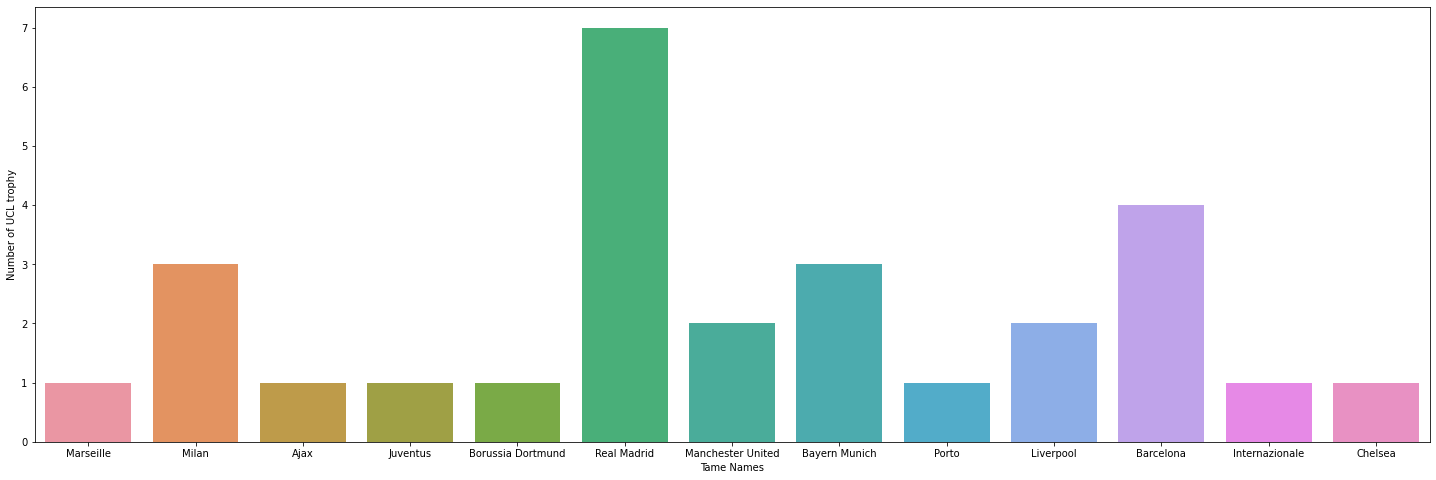

In [10]:
#visualizing
plt.figure(figsize=(25,8))
sns.countplot(x = df.team[df.champions == 1], data = df)
plt.xlabel('Tame Names')
plt.ylabel('Number of UCL trophy');

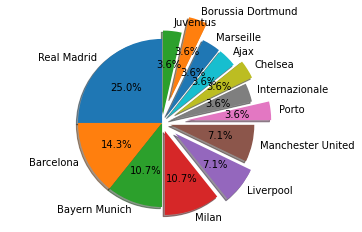

In [11]:
#visualizing in Pie chart
labels = 'Real Madrid', 'Barcelona', 'Bayern Munich', 'Milan', 'Liverpool', 'Manchester United', 'Porto', 'Internazionale', 'Chelsea', 'Ajax', 'Marseille', 'Borussia Dortmund', 'Juventus'
explode = (0, 0, 0, 0.1, 0.2, 0.1, 0.3, 0.1, 0.2, 0.1, 0.1, 0.3, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(df.team[df.champions == 1].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

<p style = "font-size : 17px; font-family : 'Times New Romans'; "><strong>Let's first see some visualization for the overall dataset.</strong></p>

<p style = "font-size : 17px; font-family : 'Times New Romans'; ">Let's first look at each columns.</p>

<p style = "font-size :18px; font-family: 'Times New Romans';"> A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions. A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate.</p>

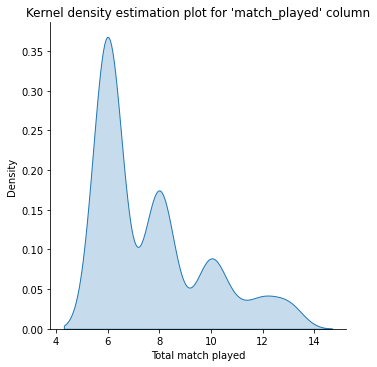

In [12]:
#Kernel density estimation plot for 'match_played' column
sns.displot(x = 'match_played', kind = 'kde', data = df, fill=True)
plt.title("Kernel density estimation plot for 'match_played' column")
plt.xlabel("Total match played");

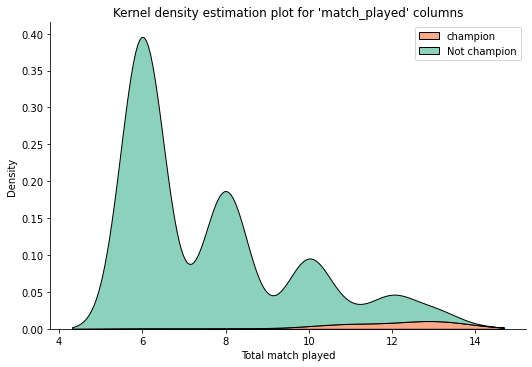

In [13]:
#Kernel density estimation plot for 'match_played' column w.r.t champions and not champions
sns.displot(x = 'match_played', hue = 'champions', kind = 'kde', data = df, legend = False, multiple="stack", aspect=1.5, palette = 'Set2')
plt.title("Kernel density estimation plot for 'match_played' columns")
plt.xlabel("Total match played")
plt.legend(['champion', 'Not champion']);

<p style = "font-size : 15px; font-family : 'Times New Romans'; "><b>Let's plot a 'ecdf' plot on same data.</b></p>

<p style = "font-size :18px; font-family: 'Times New Romans';">An “empirical cumulative distribution function” (ECDF) represents the proportion or count of observations falling below each unique value in a dataset. This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value. Compared to a histogram or density plot, it has the advantage that each observation is visualized directly, meaning that there are no binning or smoothing parameters that need to be adjusted. It also aids direct comparisons between multiple distributions.</p>

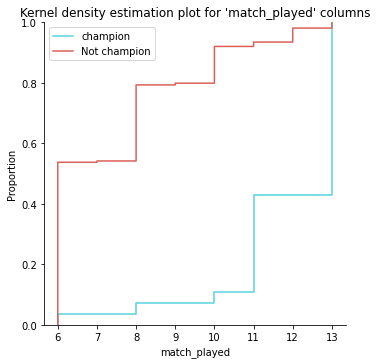

In [14]:
#Kernel density estimation plot for 'match_played' column w.r.t champions and not champions
sns.displot(x = 'match_played', hue = 'champions', kind = 'ecdf', data = df, legend = False, palette = 'hls')
plt.title("Kernel density estimation plot for 'match_played' columns")
plt.legend(['champion', 'Not champion']);

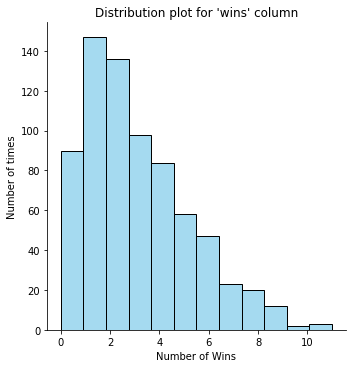

In [15]:
#distribution plot for 'wins' column
sns.displot(x = 'wins', data = df, bins = 12, color = 'skyblue')
plt.title("Distribution plot for 'wins' column")
plt.xlabel("Number of Wins")
plt.ylabel("Number of times");

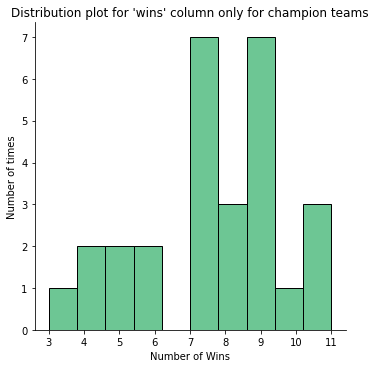

In [16]:
#distribution plot for 'wins' column only for champion teams
sns.displot(x = df.wins[df.champions==1], data = df, bins = 10, color= 'mediumseagreen')
plt.title("Distribution plot for 'wins' column only for champion teams")
plt.xlabel("Number of Wins")
plt.ylabel("Number of times");

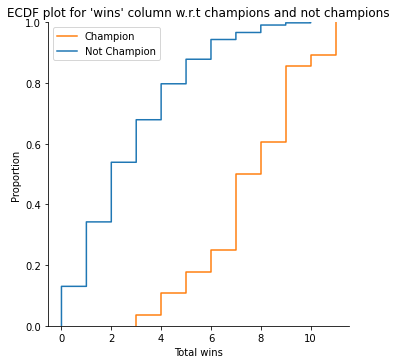

In [17]:
#empirical cumulative distribution function plot for 'wins' column w.r.t champions and not champions.
sns.displot(kind = 'ecdf', x = 'wins', hue = 'champions', data = df, legend = False)
plt.title("ECDF plot for 'wins' column w.r.t champions and not champions")
plt.xlabel("Total wins")
plt.legend(['Champion', 'Not Champion']);

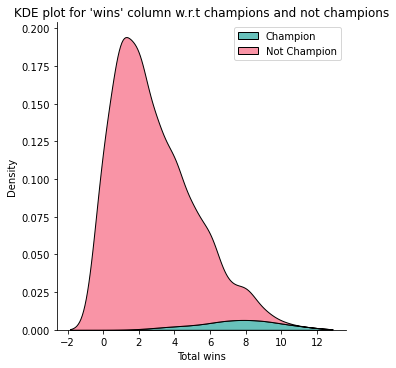

In [18]:
#Kernel density estimation plot for 'wins' column w.r.t champions and not champions
sns.displot(kind = 'kde', x = 'wins', hue = 'champions', data = df, legend = False, multiple="stack", aspect=1, palette = 'husl')
plt.title("KDE plot for 'wins' column w.r.t champions and not champions")
plt.xlabel("Total wins")
plt.legend(['Champion', 'Not Champion']);

Let's analyse `losts` column

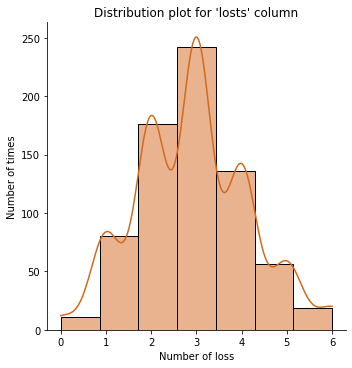

In [19]:
#distribution plot for 'losts' column
sns.displot(x = 'losts', data = df, bins = 7, color = 'chocolate', kde = True)
plt.title("Distribution plot for 'losts' column")
plt.xlabel("Number of loss")
plt.ylabel("Number of times");

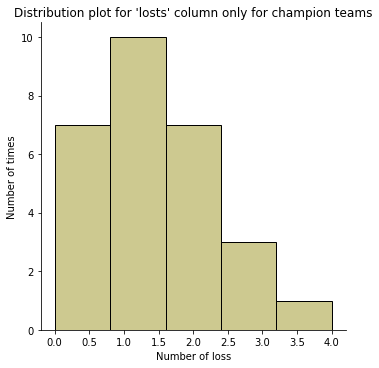

In [20]:
#distribution plot for 'losts' column only for champion teams
sns.displot(x = df.losts[df.champions==1], data = df, bins = 5, color= 'darkkhaki')
plt.title("Distribution plot for 'losts' column only for champion teams")
plt.xlabel("Number of loss")
plt.ylabel("Number of times");

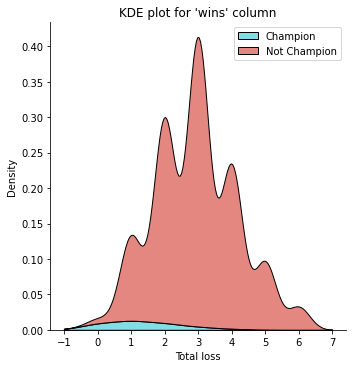

In [21]:
#Kernel density estimation plot for 'losts' column w.r.t champions and not champions
sns.displot(kind = 'kde', x = 'losts', hue = 'champions', data = df, legend = False, multiple="stack", aspect=1, palette = 'hls')
plt.title("KDE plot for 'wins' column")
plt.xlabel("Total loss")
plt.legend(['Champion', 'Not Champion']);

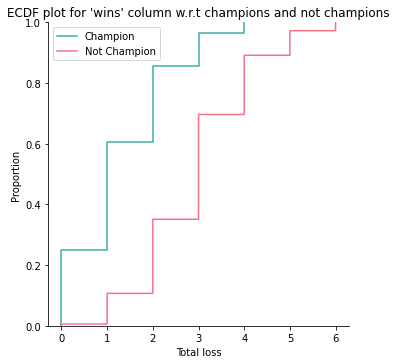

In [22]:
#empirical cumulative distribution function plot for 'losts' column w.r.t champions and not champions.
sns.displot(kind = 'ecdf', x = 'losts', hue = 'champions', data = df, legend = False, palette = 'husl')
plt.title("ECDF plot for 'wins' column w.r.t champions and not champions")
plt.xlabel("Total loss")
plt.legend(['Champion', 'Not Champion']);

<p style = "font-size : 17px; font-family : 'Times New Romans'; "><b>lets compare `Goals Difference` between champions and not champions.</b>

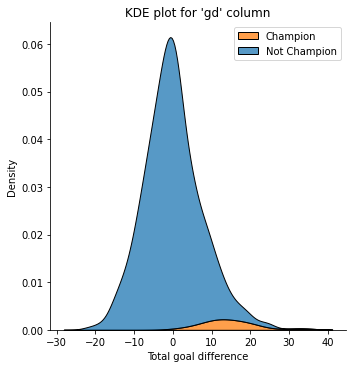

In [23]:
#Kernel density estimation plot for 'gd' column w.r.t champions and not champions
sns.displot(kind = 'kde', x = 'gd', hue = 'champions', data = df, legend = False, multiple="stack", aspect=1)
plt.title("KDE plot for 'gd' column")
plt.xlabel("Total goal difference")
plt.legend(['Champion', 'Not Champion']);

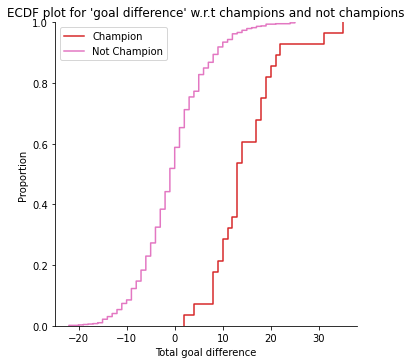

In [24]:
#empirical cumulative distribution function plot for 'gd' column w.r.t champions and not champions.
sns.displot(kind = 'ecdf', x = 'gd', hue = 'champions', data = df, legend = False, palette = 'tab10_r')
plt.title("ECDF plot for 'goal difference' w.r.t champions and not champions")
plt.xlabel("Total goal difference")
plt.legend(['Champion', 'Not Champion']);

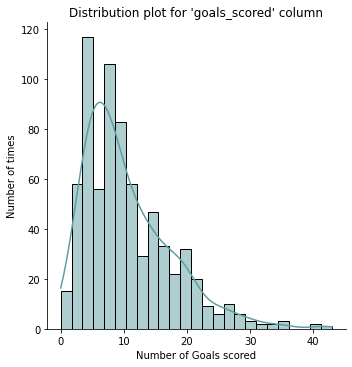

In [25]:
#distribution plot for 'goals_acored' column
sns.displot(x = 'goals_scored', data = df, bins = 25, color = 'cadetblue', kde = True)
plt.title("Distribution plot for 'goals_scored' column")
plt.xlabel("Number of Goals scored")
plt.ylabel("Number of times");

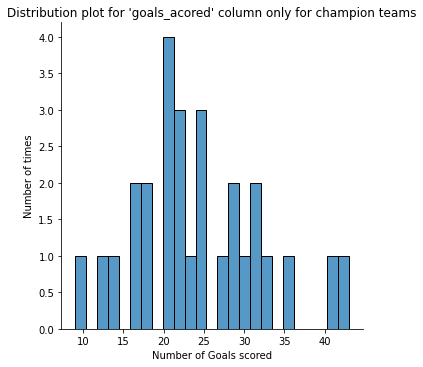

In [26]:
#distribution plot for 'goals_acored' column only for champion teams
sns.displot(x = df.goals_scored[df.champions==1], data = df, bins = 25)
plt.title("Distribution plot for 'goals_acored' column only for champion teams")
plt.xlabel("Number of Goals scored")
plt.ylabel("Number of times");

<p style = "font-size : 17px; font-family : 'Times New Romans'; "><b>Lets compare total Goals Scored between champions and not champions.</b>

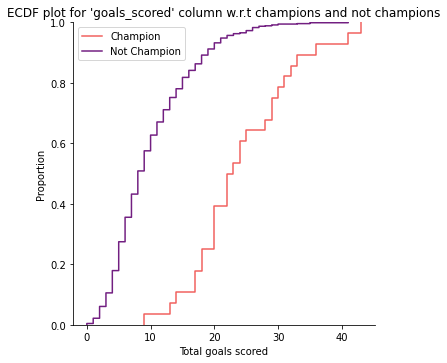

In [27]:
#empirical cumulative distribution function plot for 'goals_scored' column w.r.t champions and not champions.
sns.displot(kind = 'ecdf', x = 'goals_scored', hue = 'champions', data = df, palette =  'magma', legend = False)
plt.title("ECDF plot for 'goals_scored' column w.r.t champions and not champions")
plt.xlabel("Total goals scored")
plt.legend(['Champion', 'Not Champion']);

<p style = "font-size : 17px; font-family : 'Times New Romans'; "><b>lets compare `Goals Conceded` between champions and not champions.</b></p>

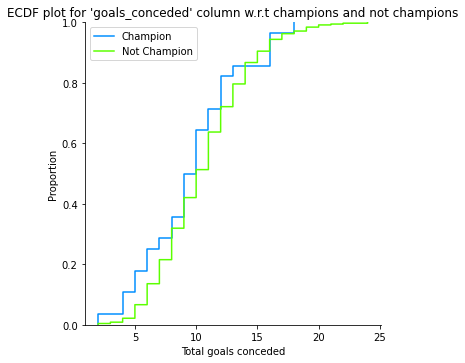

In [28]:
#empirical cumulative distribution function plot for 'goals_scored' column w.r.t champions and not champions.
sns.displot(kind = 'ecdf', x = 'goals_conceded', hue = 'champions', data = df, legend = False,  palette =  'gist_rainbow')
plt.title("ECDF plot for 'goals_conceded' column w.r.t champions and not champions")
plt.xlabel("Total goals conceded")
plt.legend(['Champion', 'Not Champion']);

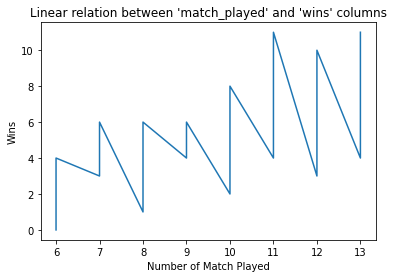

In [29]:
#find a linear relation between match_played and wins columns.
sns.lineplot(x = 'match_played', y = 'wins', data = df, estimator=None)
plt.title("Linear relation between 'match_played' and 'wins' columns")
plt.xlabel("Number of Match Played")
plt.ylabel("Wins");

<p style = "font-size :18px; font-family: 'Times New Romans';"> Violin plot draws a combination of boxplot and kernel density estimate(kde). A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.</p>

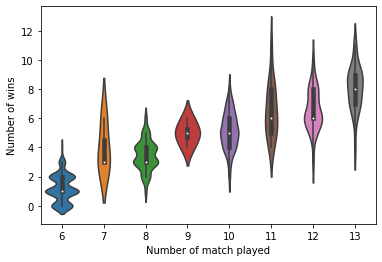

In [30]:
sns.violinplot(x = 'match_played', y = 'wins', data = df)
plt.xlabel("Number of match played")
plt.ylabel("Number of wins");

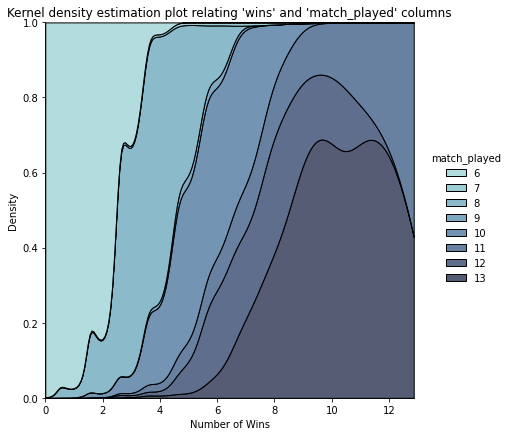

In [31]:
#Kernel density estimation plot relating 'wins' and 'match_played' columns
sns.displot(
    data=df,
    x="wins", hue="match_played",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title("Kernel density estimation plot relating 'wins' and 'match_played' columns")
plt.xlabel("Number of Wins");

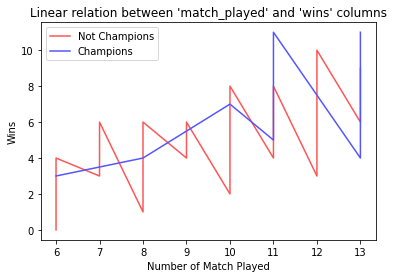

In [32]:
#find a linear relation between match_played and wins columns for the champions teams and not champion teams.
sns.lineplot(x = 'match_played', y = 'wins', data = df, hue = 'champions', estimator=None, legend = False, palette = 'seismic_r')
plt.title("Linear relation between 'match_played' and 'wins' columns")
plt.xlabel("Number of Match Played")
plt.ylabel("Wins")
plt.legend(['Not Champions', 'Champions']);

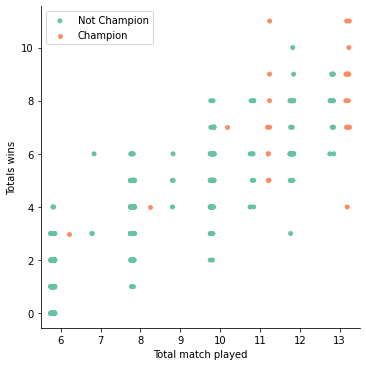

In [33]:
sns.catplot(x = 'match_played', y = 'wins', data = df, hue = 'champions', palette="Set2", dodge=True, legend = False)
plt.xlabel("Total match played")
plt.ylabel("Totals wins")
plt.legend(['Not Champion', 'Champion']);

<p style = "font-size : 17px; font-family : 'Times New Romans'; "><strong>Let's visualize the relations between match_played and goals_scored columns</strong></p>

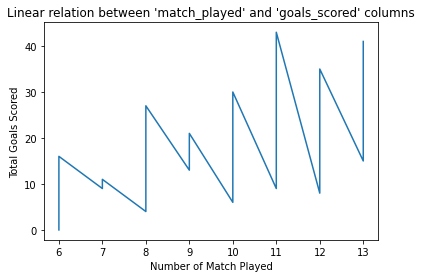

In [34]:
#find a linear relation between match_played and goals_scored columns.
sns.lineplot(x = 'match_played', y = 'goals_scored', data = df, estimator=None)
plt.title("Linear relation between 'match_played' and 'goals_scored' columns")
plt.xlabel("Number of Match Played")
plt.ylabel("Total Goals Scored");

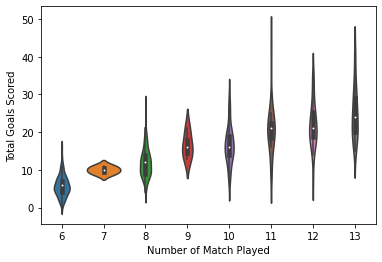

In [35]:
sns.violinplot(x = 'match_played', y = 'goals_scored', data = df)
plt.xlabel("Number of Match Played")
plt.ylabel("Total Goals Scored");

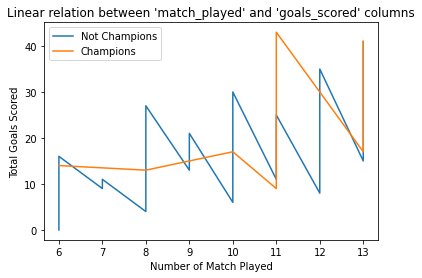

In [36]:
#find a linear relation between match_played and goals_scored columns for the champions teams and not champion teams.
sns.lineplot(x = 'match_played', y = 'goals_scored', hue = 'champions', data = df, estimator=None, legend = False)
plt.title("Linear relation between 'match_played' and 'goals_scored' columns")
plt.xlabel("Number of Match Played")
plt.ylabel("Total Goals Scored")
plt.legend(['Not Champions', 'Champions']);

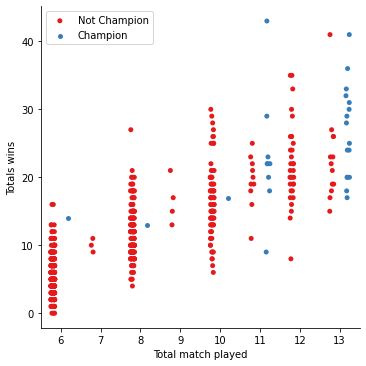

In [37]:
sns.catplot(x = 'match_played', y = 'goals_scored', data = df, hue = 'champions', palette="Set1", dodge=True, legend = False)
plt.xlabel("Total match played")
plt.ylabel("Totals wins")
plt.legend(['Not Champion', 'Champion']);

<p style = "font-size : 17px; font-family : 'Times New Romans'; "><strong>Let's visualize the relations between match_played and goal difference (gd) columns</strong></p>

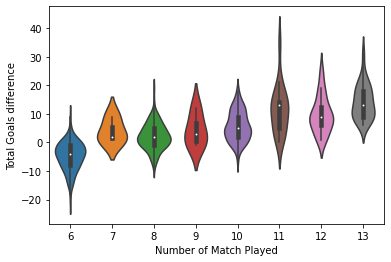

In [38]:
sns.violinplot(x = 'match_played', y = 'gd', data = df)
plt.xlabel("Number of Match Played")
plt.ylabel("Total Goals difference");

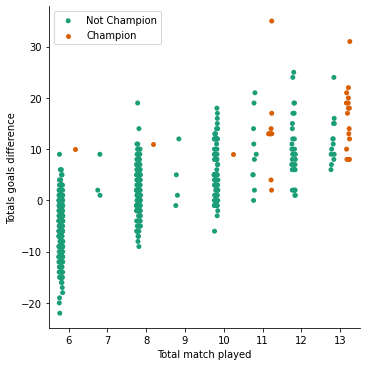

In [39]:
sns.catplot(x = 'match_played', y = 'gd', data = df, hue = 'champions', palette= 'Dark2', dodge=True, legend = False)
plt.xlabel("Total match played")
plt.ylabel("Totals goals difference")
plt.legend(['Not Champion', 'Champion']);

<p style = "font-size : 40px; color : teal ; font-family : 'Optima'; text-align : center; border-radius: 5px 5px;"><strong>Team Analysis </strong></p> 

In [40]:
#creating a list of these teams
teams = ['Real Madrid', 'Barcelona', 'Milan', 'Manchester United', 'Paris Saint-Germain', 'Bayern Munich', 'Ajax', 'Juventus', 'Chelsea', 'Liverpool', 'Manchester City']

In [41]:
#function to create new dataframe with specific team name
def create_team_data(data, name):
    return data[data.team == name]

In [42]:
#Real Madrids total stats.
madrid = create_team_data(df, 'Real Madrid').drop('year', axis = 1)
madrid.sum(numeric_only = True)

match_played      243
wins              145
draws              45
losts              53
goals_scored      509
goals_conceded    266
gd                241
group_point       310
champions           7
dtype: int64

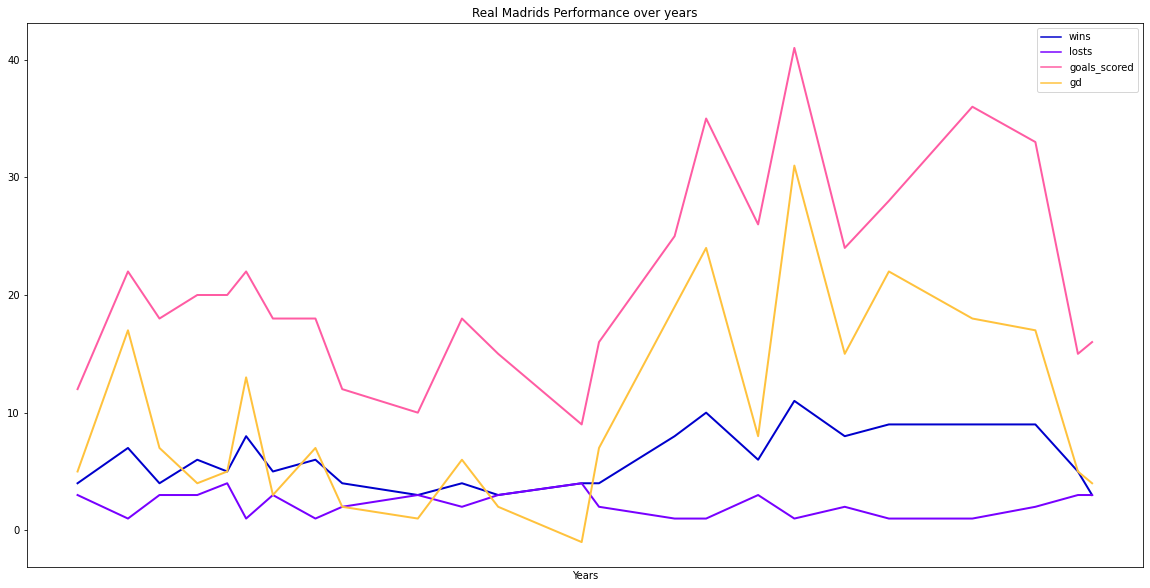

In [43]:
plt.figure(figsize=(20,10))
sns.lineplot(data = madrid[['wins', 'losts', 'goals_scored', 'gd']], palette='gnuplot2', linewidth=2, dashes = False)
plt.title("Real Madrids Performance over years")
plt.xlabel("Years")
plt.xticks([]);

In [44]:
#Barcelonas total stats.
barca = create_team_data(df, 'Barcelona').drop('year', axis = 1)
barca.sum(numeric_only = True)

match_played      227
wins              136
draws              57
losts              40
goals_scored      458
goals_conceded    226
gd                232
group_point       287
champions           4
dtype: int64

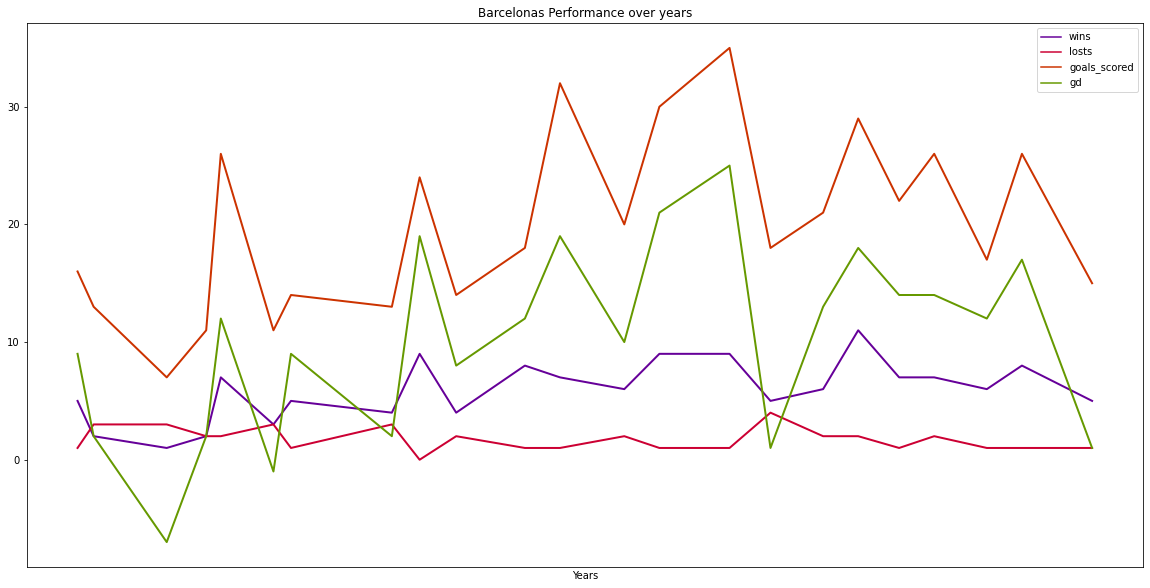

In [45]:
plt.figure(figsize=(20,10))
sns.lineplot(data = barca[['wins', 'losts', 'goals_scored', 'gd']], palette='brg', linewidth=2, dashes = False)
plt.title("Barcelonas Performance over years")
plt.xlabel("Years")
plt.xticks([]);

In [46]:
#Bayern Munichs total stats.
bayern = create_team_data(df, 'Bayern Munich').drop('year', axis = 1)
bayern.sum(numeric_only = True)

match_played      227
wins              133
draws              43
losts              51
goals_scored      463
goals_conceded    233
gd                225
group_point       280
champions           3
dtype: int64

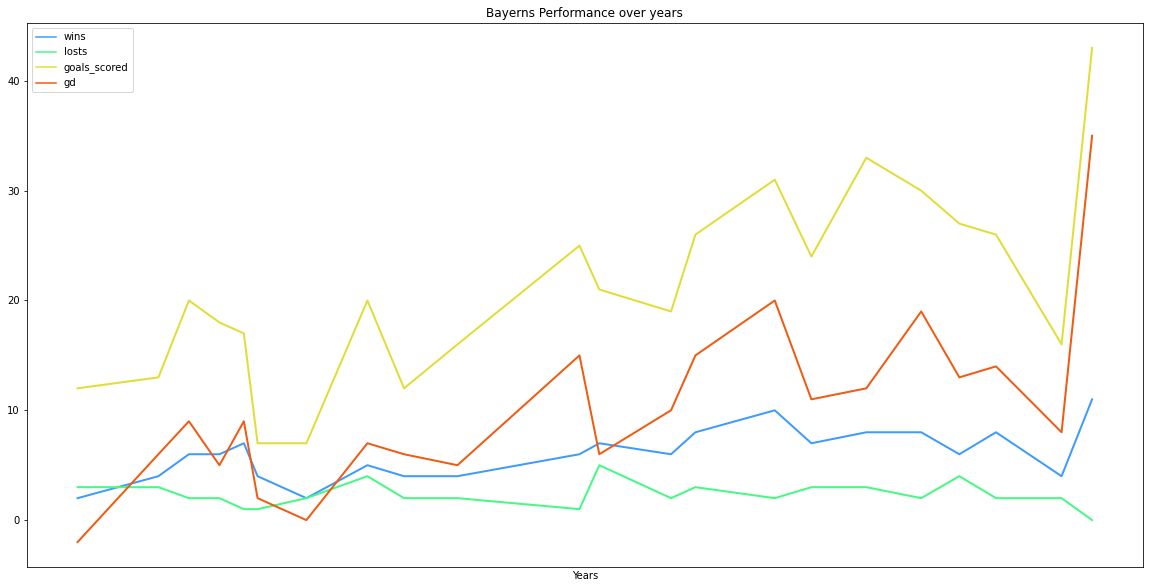

In [47]:
plt.figure(figsize=(20,10))
sns.lineplot(data = bayern[['wins', 'losts', 'goals_scored', 'gd']], palette='turbo', linewidth=2, dashes = False)
plt.title("Bayerns Performance over years")
plt.xlabel("Years")
plt.xticks([]);

In [48]:
#Liverpools total stats.
liverpool = create_team_data(df, 'Liverpool').drop('year', axis = 1)
liverpool.sum(numeric_only = True)

match_played      110
wins               55
draws              27
losts              28
goals_scored      190
goals_conceded    112
gd                 77
group_point       112
champions           2
dtype: int64

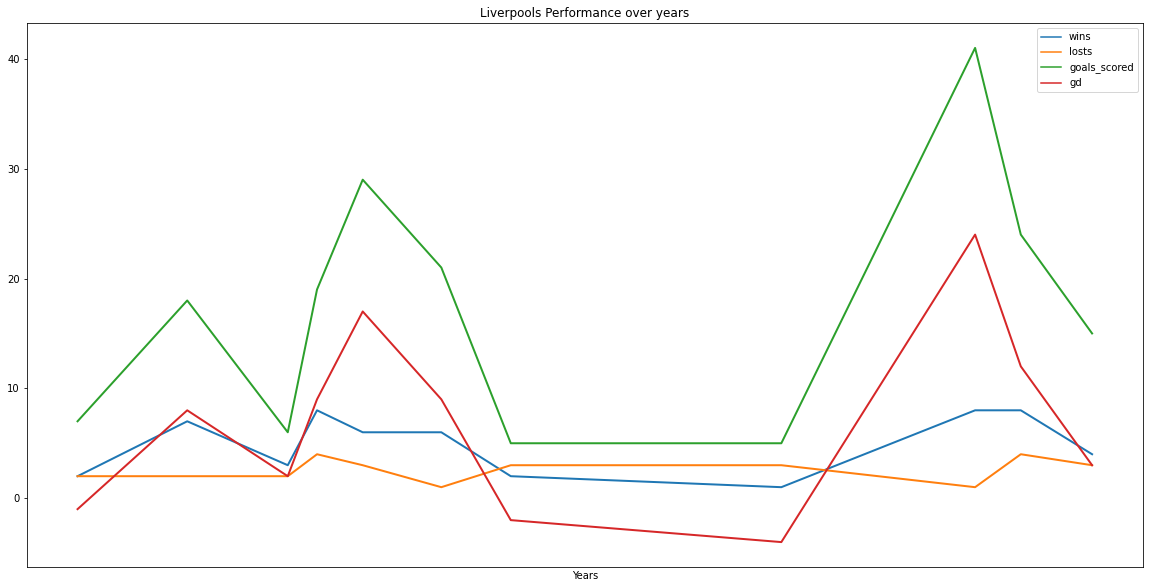

In [49]:
plt.figure(figsize=(20,10))
sns.lineplot(data = liverpool[['wins', 'losts', 'goals_scored', 'gd']], linewidth=2, dashes = False)
plt.title("Liverpools Performance over years")
plt.xlabel("Years")
plt.xticks([]);

In [50]:
#Chelseas total stats.
chelsea = create_team_data(df, 'Chelsea').drop('year', axis = 1)
chelsea.sum(numeric_only = True)

match_played      157
wins               77
draws              45
losts              36
goals_scored      270
goals_conceded    156
gd                114
group_point       194
champions           1
dtype: int64

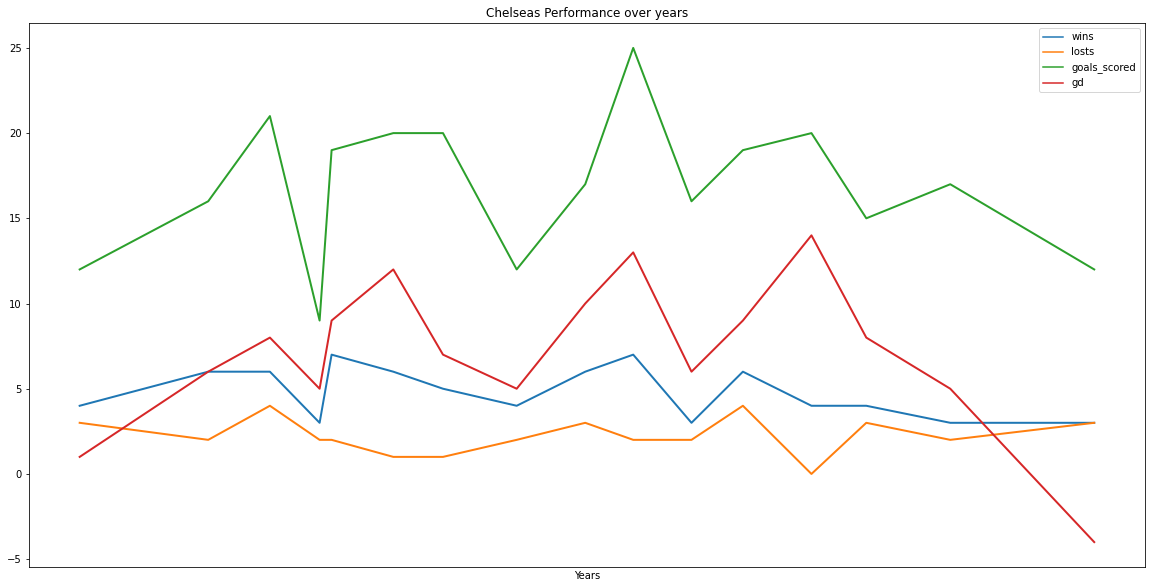

In [51]:
plt.figure(figsize=(20,10))
sns.lineplot(data = chelsea[['wins', 'losts', 'goals_scored', 'gd']], linewidth=2, dashes = False)
plt.title("Chelseas Performance over years")
plt.xlabel("Years")
plt.xticks([]);

In [52]:
#Manchester Citys total stats.
mancity = create_team_data(df, 'Manchester City').drop('year', axis = 1)
mancity.sum(numeric_only = True)

match_played       77
wins               38
draws              15
losts              24
goals_scored      152
goals_conceded    103
gd                 49
group_point        99
champions           0
dtype: int64

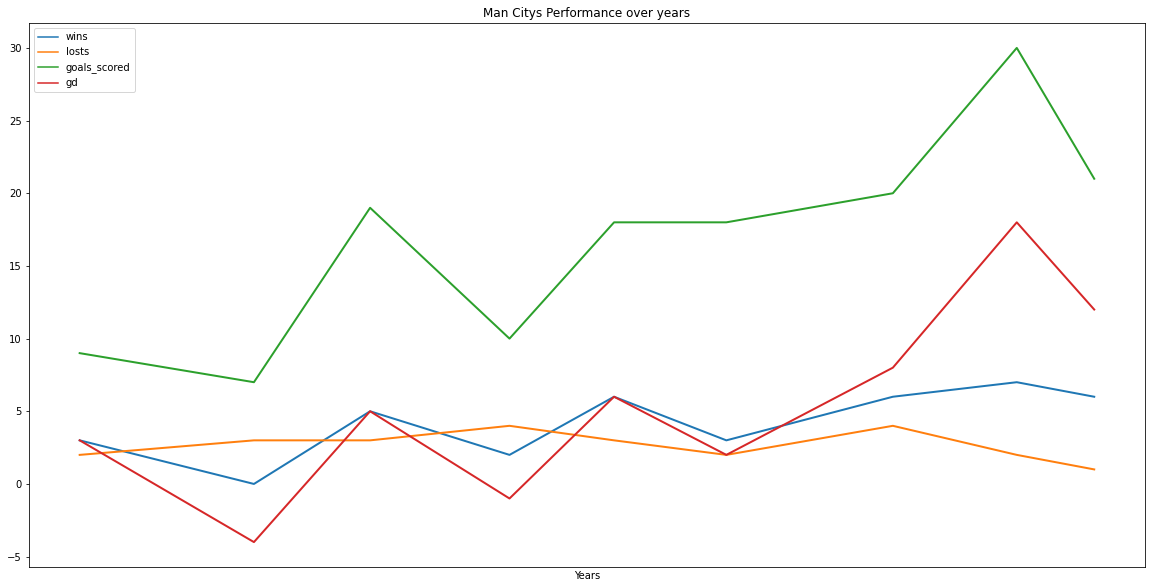

In [53]:
plt.figure(figsize=(20,10))
sns.lineplot(data = mancity[['wins', 'losts', 'goals_scored', 'gd']], linewidth=2, dashes = False)
plt.title("Man Citys Performance over years")
plt.xlabel("Years")
plt.xticks([]);

In [54]:
#Juventuses total stats.
juve = create_team_data(df, 'Juventus').drop('year', axis = 1)
juve.sum(numeric_only = True)

match_played      170
wins               87
draws              39
losts              43
goals_scored      264
goals_conceded    161
gd                100
group_point       211
champions           1
dtype: int64

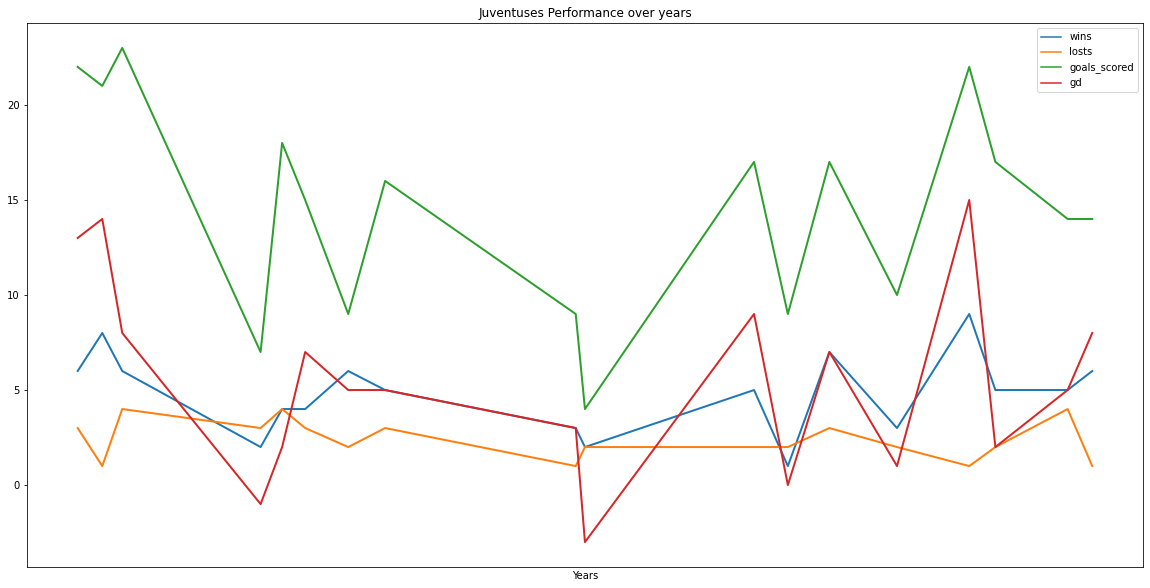

In [55]:
plt.figure(figsize=(20,10))
sns.lineplot(data = juve[['wins', 'losts', 'goals_scored', 'gd']], linewidth=2, dashes = False)
plt.title("Juventuses Performance over years")
plt.xlabel("Years")
plt.xticks([]);

In [56]:
#PSGs total stats.
psg = create_team_data(df, 'Paris Saint-Germain').drop('year', axis = 1)
psg.sum(numeric_only = True)

match_played      103
wins               57
draws              20
losts              25
goals_scored      204
goals_conceded    111
gd                 95
group_point       142
champions           0
dtype: int64

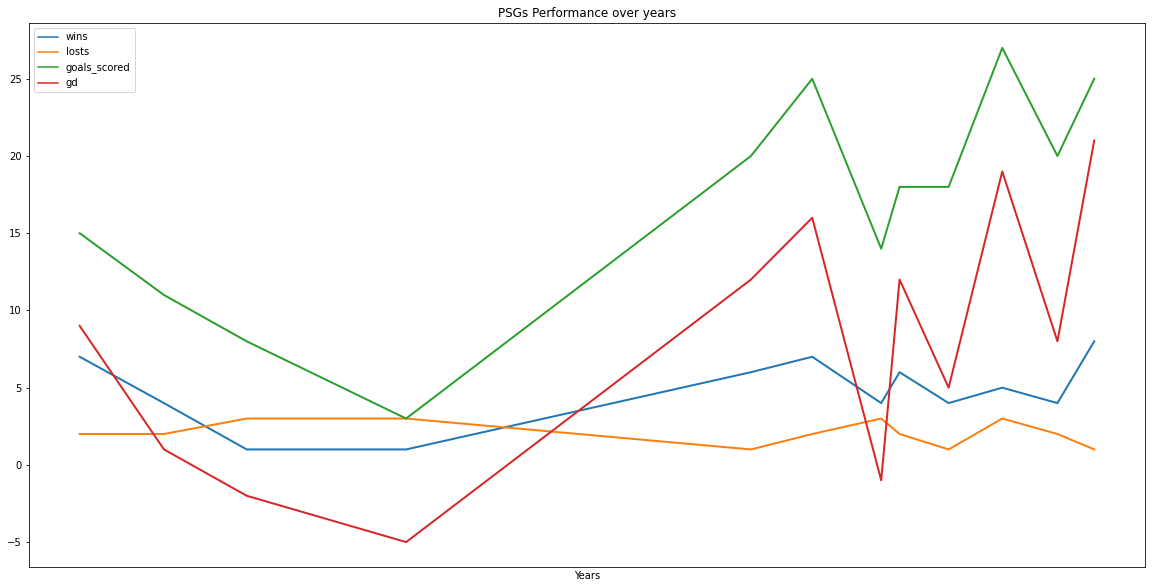

In [57]:
plt.figure(figsize=(20,10))
sns.lineplot(data = psg[['wins', 'losts', 'goals_scored', 'gd']], linewidth=2, dashes = False)
plt.title("PSGs Performance over years")
plt.xlabel("Years")
plt.xticks([]);

<p style = "font-size : 35px; color : olive ; font-family : 'Optima'; text-align : center; border-radius: 5px 5px;"><strong>Comparing stats among Top teams </strong></p> 

In [58]:
#function that will return a dataframe with specific feature values that will help us visualizing the comparison among these teams.
def new_data(data, team_list, drop_list):
    df_dict = {}
    for team in team_list:
        values = data[data.team == team].drop(drop_list, axis = 1).sum()
        df_dict[team] = values
    return pd.DataFrame(df_dict).T

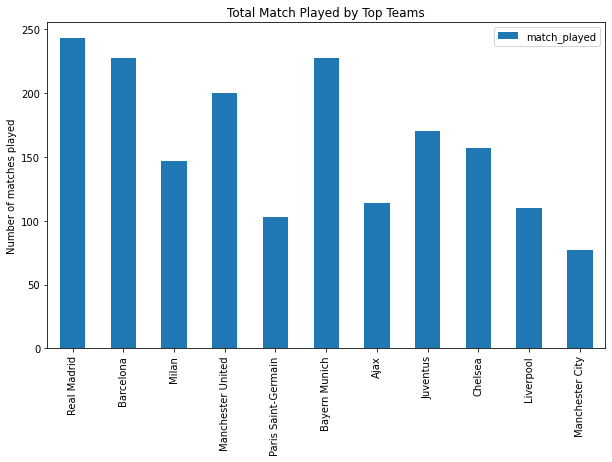

In [59]:
#comparing total matches top teams played.
total_matches = new_data(df, teams, ['year', 'team', 'wins', 'draws', 'losts', 'goals_conceded', 'goals_scored', 'gd', 'group_point', 'champions'])
total_matches.plot(kind = 'bar', figsize = (10, 6), colormap = 'tab10')
plt.title("Total Match Played by Top Teams")
plt.ylabel('Number of matches played');

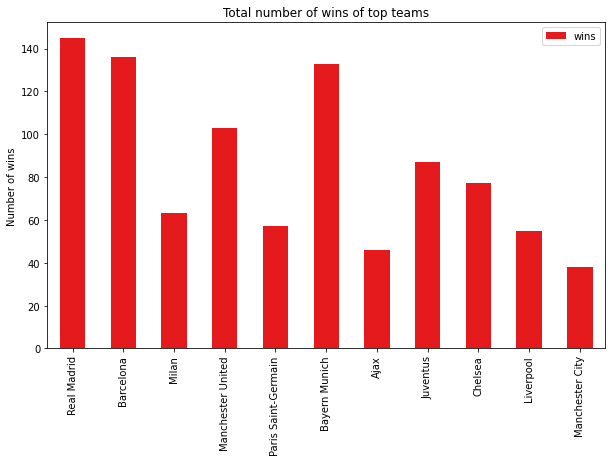

In [60]:
#comparing total wins among top teams.
wins = new_data(df, teams, ['year', 'team', 'match_played', 'draws', 'losts', 'goals_conceded', 'goals_scored', 'gd', 'group_point', 'champions'])
wins.plot(kind = 'bar', figsize = (10, 6), colormap = 'Set1')
plt.title("Total number of wins of top teams")
plt.ylabel('Number of wins');

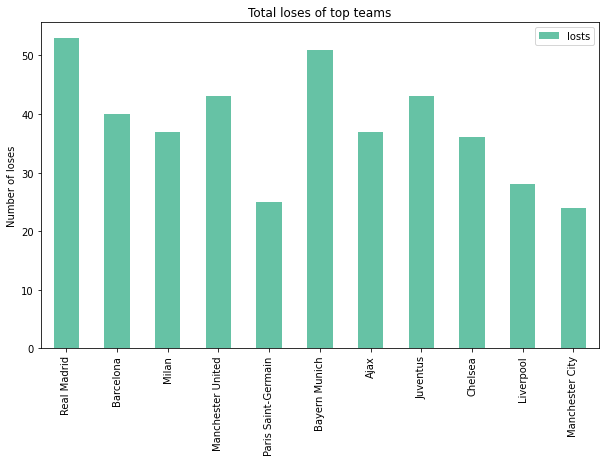

In [61]:
#comparing total looses among top teams
loses = new_data(df, teams, ['year', 'team', 'match_played', 'draws', 'wins', 'goals_conceded', 'goals_scored', 'gd', 'group_point', 'champions'])
loses.plot(kind = 'bar', figsize = (10, 6), colormap = 'Set2')
plt.title("Total loses of top teams")
plt.ylabel('Number of loses');

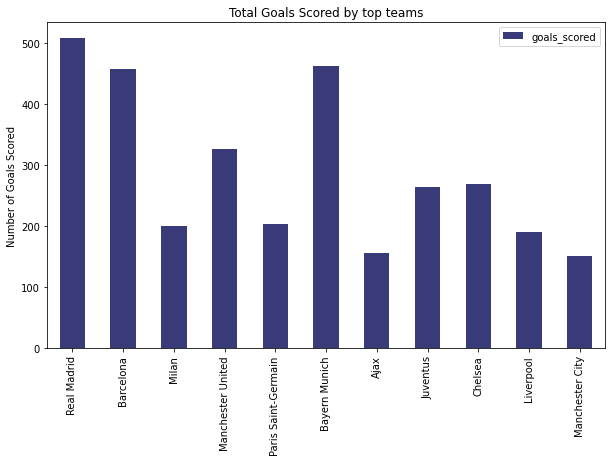

In [62]:
#comparing total goals scored among top teams
gs = new_data(df, teams, ['year', 'team', 'match_played', 'draws', 'wins', 'goals_conceded', 'losts', 'gd', 'group_point', 'champions'])
gs.plot(kind = 'bar', figsize = (10, 6), colormap = 'tab20b')
plt.title("Total Goals Scored by top teams")
plt.ylabel('Number of Goals Scored');

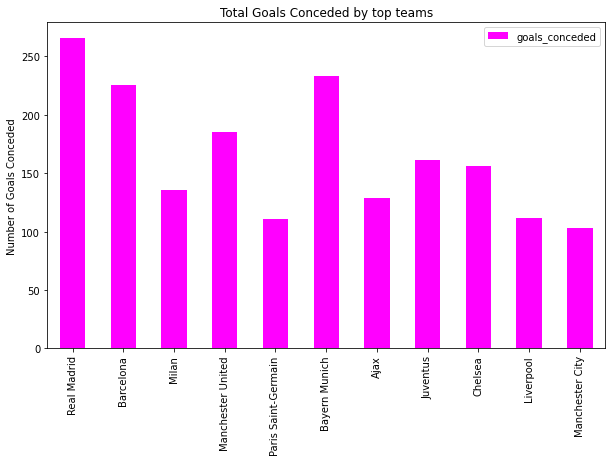

In [63]:
#comparing total goals conceded among top teams
gc = new_data(df, teams, ['year', 'team', 'match_played', 'draws', 'wins', 'goals_scored', 'losts', 'gd', 'group_point', 'champions'])
gc.plot(kind = 'bar', figsize = (10, 6), colormap = 'spring')
plt.title("Total Goals Conceded by top teams")
plt.ylabel('Number of Goals Conceded');

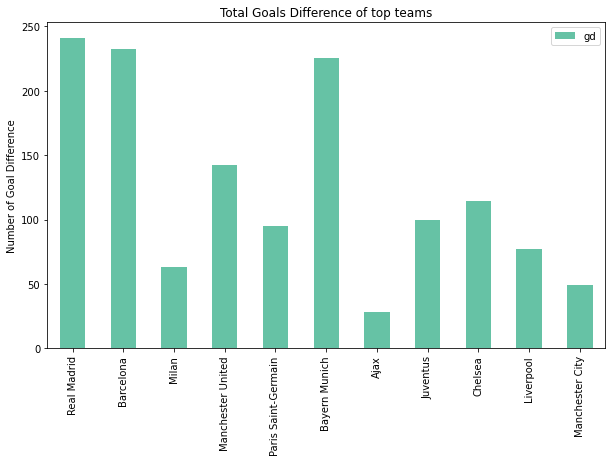

In [64]:
#comparing total goals conceded among top teams
gd = new_data(df, teams, ['year', 'team', 'match_played', 'draws', 'wins', 'goals_scored', 'losts', 'goals_conceded', 'group_point', 'champions'])
gd.plot(kind = 'bar', figsize = (10, 6), colormap = 'Set2')
plt.title("Total Goals Difference of top teams")
plt.ylabel('Number of Goal Difference');

<p style = "font-size : 35px; color : maroon ; font-family : 'Optima'; text-align : center; border-radius: 5px 5px;"><strong>Comparing between teams </strong></p>  

In [65]:
#function to create new dataframe with specific team and its stats
def team_df(data, team_name):
    return data[data.team == team_name]

In [66]:
#new dataframes
madrid = team_df(df, 'Real Madrid')
barca = team_df(df, 'Barcelona')
bayern = team_df(df, 'Bayern Munich')
mancity = team_df(df, 'Manchester City')
chelsea = team_df(df, 'Chelsea')
psg = team_df(df, 'Paris Saint-Germain')
liverpool = team_df(df, 'Liverpool')

<p style = "font-size : 17px; font-family : 'Times New Romans'; "><strong>Comparing between Real Madrid and Barcelona</strong></p>

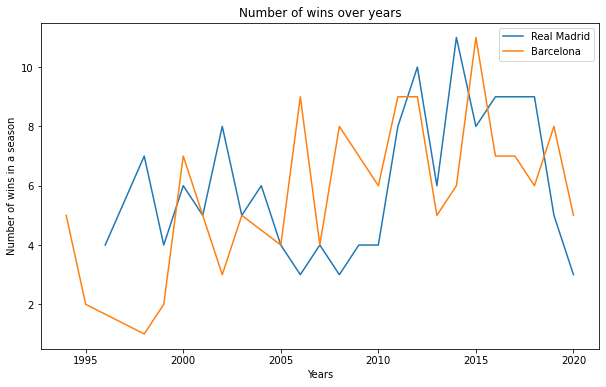

In [67]:
#comparing wins over the years between Real Madrid and Barcelona
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'year', y = 'wins', data = madrid)
sns.lineplot(x = 'year', y = 'wins', data = barca)
plt.title("Number of wins over years")
plt.xlabel("Years")
plt.ylabel("Number of wins in a season")
plt.legend(['Real Madrid', 'Barcelona']);

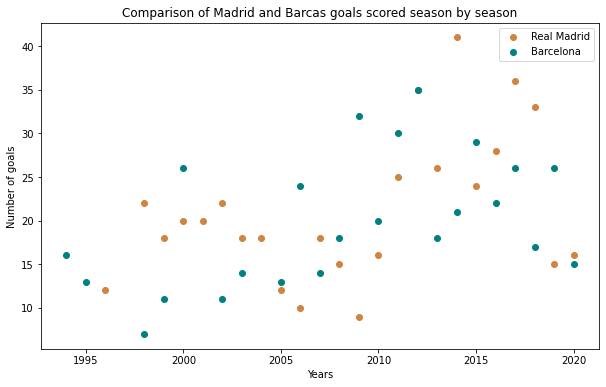

In [68]:
#scatter plot visualizing number of goals scored by these two teams over the years
plt.figure(figsize = (10, 6))
plt.scatter( madrid.year, madrid.goals_scored, color = 'peru')
plt.scatter( barca.year, barca.goals_scored, color = 'teal')
plt.title("Comparison of Madrid and Barcas goals scored season by season")
plt.xlabel("Years")
plt.ylabel("Number of goals")
plt.legend(['Real Madrid', 'Barcelona']);

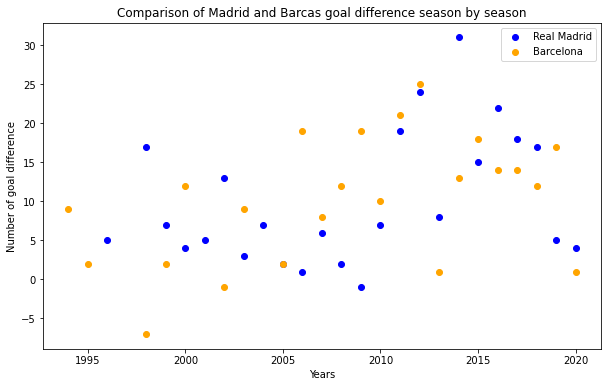

In [69]:
#scatter plot visualizing these two teams goals difference
plt.figure(figsize = (10, 6))
plt.title("Comparison of Madrid and Barcas goal difference season by season")
plt.scatter( madrid.year, madrid.gd, color = 'blue')
plt.scatter( barca.year, barca.gd, color = 'orange')
plt.xlabel("Years")
plt.ylabel("Number of goal difference")
plt.legend(['Real Madrid', 'Barcelona']);

<p style = "font-size : 17px; font-family : 'Times New Romans'; "><strong>Comparing among Bayern Munich, Paris Saint-Germain and Liverpool</strong></p>

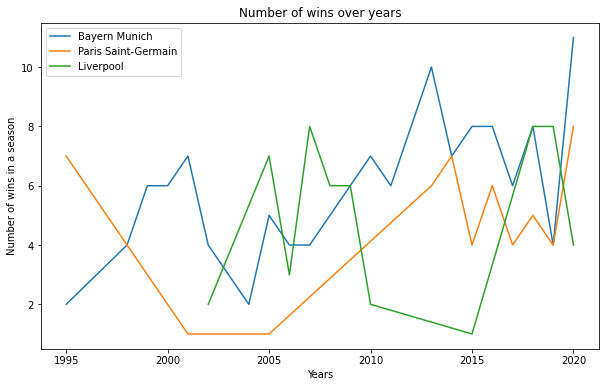

In [70]:
#comparing wins over the years
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'year', y = 'wins', data = bayern)
sns.lineplot(x = 'year', y = 'wins', data = psg)
sns.lineplot(x = 'year', y = 'wins', data = liverpool)
plt.title("Number of wins over years")
plt.xlabel("Years")
plt.ylabel("Number of wins in a season")
plt.legend(['Bayern Munich', 'Paris Saint-Germain', 'Liverpool']);

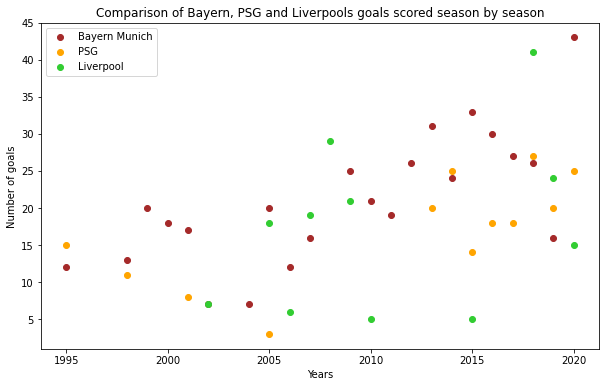

In [71]:
#scatter plot visualizing number of goals scored by these three teams over the years
plt.figure(figsize = (10, 6))
plt.scatter( bayern.year, bayern.goals_scored, color = 'brown')
plt.scatter( psg.year, psg.goals_scored, color = 'orange')
plt.scatter( liverpool.year, liverpool.goals_scored, color = 'limegreen')
plt.title("Comparison of Bayern, PSG and Liverpools goals scored season by season")
plt.xlabel("Years")
plt.ylabel("Number of goals")
plt.legend(['Bayern Munich', 'PSG', 'Liverpool']);

<p style = "font-size : 17px; font-family : 'Times New Romans'; "><strong>Comparing between Chelsea and Manchester City</strong></p>

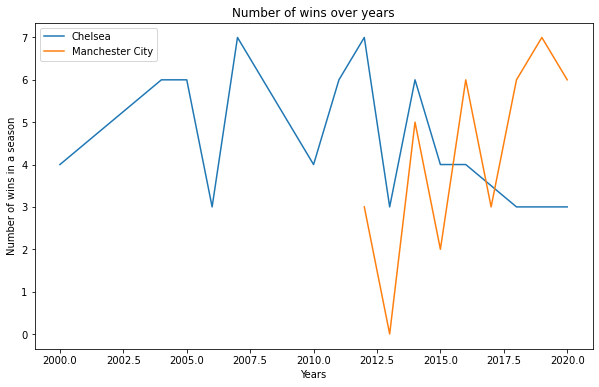

In [72]:
#comparing wins over the years between Real Madrid and Barcelona
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'year', y = 'wins', data = chelsea)
sns.lineplot(x = 'year', y = 'wins', data = mancity)
plt.title("Number of wins over years")
plt.xlabel("Years")
plt.ylabel("Number of wins in a season")
plt.legend(['Chelsea', 'Manchester City']);

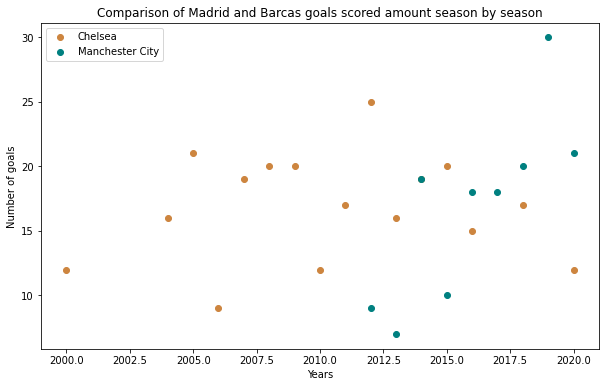

In [73]:
#scatter plot visualizing number of goals scored by these two teams over the years
plt.figure(figsize = (10, 6))
plt.scatter( chelsea.year, chelsea.goals_scored, color = 'peru')
plt.scatter( mancity.year, mancity.goals_scored, color = 'teal')
plt.title("Comparison of Madrid and Barcas goals scored amount season by season")
plt.xlabel("Years")
plt.ylabel("Number of goals")
plt.legend(['Chelsea', 'Manchester City']);

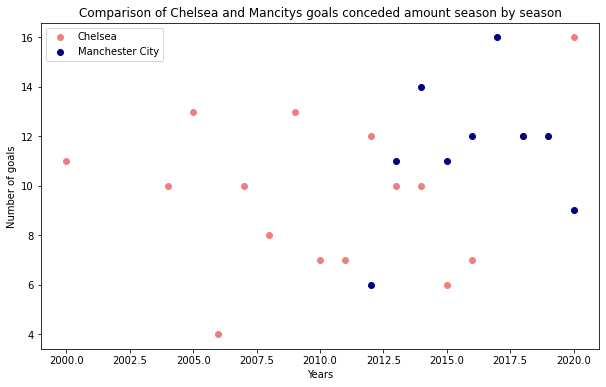

In [74]:
#scatter plot visualizing number of goals conceded by these two teams over the years
plt.figure(figsize = (10, 6))
plt.scatter( chelsea.year, chelsea.goals_conceded, color = 'lightcoral')
plt.scatter( mancity.year, mancity.goals_conceded, color = 'navy')
plt.title("Comparison of Chelsea and Mancitys goals conceded amount season by season")
plt.xlabel("Years")
plt.ylabel("Number of goals")
plt.legend(['Chelsea', 'Manchester City']);